## Hierarchial clustering of genomes vectorized using dna2vec embedding

Vectorisation of a genome as a normalized element-wise sum of trigrams of constituent embedding vectors

In [10]:
from fastai import basic_data
from dna2vec.multi_k_model import MultiKModel
import sys
sys.path.append("../mylib/")
from genomic import sequence 
from functools import partial
import pandas as pd
import numpy as np

In [11]:
FASTAS="/data/genomes/GenSeq_fastas/valid"
sequence.get_fasta_files(FASTAS)

[PosixPath('/data/genomes/GenSeq_fastas/valid/GCF_900130105.1_Vibrio.aerogenes_CECT_7868_Velvet_Prokka_genomic.fna'),
 PosixPath('/data/genomes/GenSeq_fastas/valid/GCF_900115555.1_IMG-taxon_2671180032_annotated_assembly_genomic.fna'),
 PosixPath('/data/genomes/GenSeq_fastas/valid/GCF_000706685.1_ASM70668v1_genomic.fna'),
 PosixPath('/data/genomes/GenSeq_fastas/valid/GCF_000005845.2_ASM584v2_genomic.fna'),
 PosixPath('/data/genomes/GenSeq_fastas/valid/GCF_000751775.1_A1A_genomic.fna'),
 PosixPath('/data/genomes/GenSeq_fastas/valid/GCF_000752395.1_Bacillus_andreraoultii_genomic.fna'),
 PosixPath('/data/genomes/GenSeq_fastas/valid/GCF_000517305.1_ASM51730v1_genomic.fna'),
 PosixPath('/data/genomes/GenSeq_fastas/valid/GCF_000828055.2_ASM82805v2_genomic.fna')]

In [12]:
data = sequence.Dna2VecList.from_folder("/data/genomes/GenSeq_fastas/valid",n_cpus=7,agg=partial(np.mean, axis=0))
files = data.items.copy()
sequence.GSFileProcessor().process(data)
tok = sequence.GSTokenizer(ngram=8, skip=180, n_cpus=7)
sequence.GSTokenizeProcessor(tokenizer=tok).process(data)
%time sequence.Dna2VecProcessor().process(data)

CPU times: user 17.1 s, sys: 188 ms, total: 17.3 s
Wall time: 17.2 s


In [25]:
df = pd.DataFrame(data=list(files), columns=['file', 'description', "id", "name"])
multi_fastas = df.groupby("file").agg({"id": list,"description":list, "name":'count'})

In [26]:
multi_fastas

,id,description,name
file,,,
/data/genomes/GenSeq_fastas/valid/GCF_000005845.2_ASM584v2_genomic.fna,[NC_000913.3],[NC_000913.3 Escherichia coli str. K-12 substr...,1
/data/genomes/GenSeq_fastas/valid/GCF_000517305.1_ASM51730v1_genomic.fna,[NZ_CP007039.1],"[NZ_CP007039.1 Pseudomonas cichorii JBC1, comp...",1
/data/genomes/GenSeq_fastas/valid/GCF_000706685.1_ASM70668v1_genomic.fna,"[NZ_CP007208.1, NZ_CP007209.1]",[NZ_CP007208.1 Staphylococcus xylosus strain H...,2
/data/genomes/GenSeq_fastas/valid/GCF_000751775.1_A1A_genomic.fna,"[NZ_CCRF01000001.1, NZ_CCRF01000002.1, NZ_CCRF...",[NZ_CCRF01000001.1 Bacillus thermoamylovorans ...,106
/data/genomes/GenSeq_fastas/valid/GCF_000752395.1_Bacillus_andreraoultii_genomic.fna,"[NZ_CCFJ01000001.1, NZ_CCFJ01000002.1, NZ_CCFJ...","[NZ_CCFJ01000001.1 Bacillus andreraoultii, who...",58
/data/genomes/GenSeq_fastas/valid/GCF_000828055.2_ASM82805v2_genomic.fna,[NZ_CP010523.2],[NZ_CP010523.2 Klebsiella variicola strain DSM...,1
/data/genomes/GenSeq_fastas/valid/GCF_900115555.1_IMG-taxon_2671180032_annotated_assembly_genomic.fna,"[NZ_FOWX01000096.1, NZ_FOWX01000092.1, NZ_FOWX...",[NZ_FOWX01000096.1 Pseudomonas borbori strain ...,96
/data/genomes/GenSeq_fastas/valid/GCF_900130105.1_Vibrio.aerogenes_CECT_7868_Velvet_Prokka_genomic.fna,"[NZ_FQXZ01000077.1, NZ_FQXZ01000076.1, NZ_FQXZ...","[NZ_FQXZ01000077.1 Vibrio aerogenes CECT 7868,...",77


In [7]:
ids = [f['id'] for f in files]

df=pd.DataFrame(data=np.asarray(data.items),index=ids)

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

x=np.asarray(data.items)
bad_fastas = np.where(np.mean(x,axis=1) == 0.)[0]
X = np.delete(x, bad_fastas,0)

In [14]:
labelList=np.delete(np.asarray(ids), bad_fastas)

linked = linkage(X, 'single')

In [15]:
np.ravel(X).shape

(34100,)

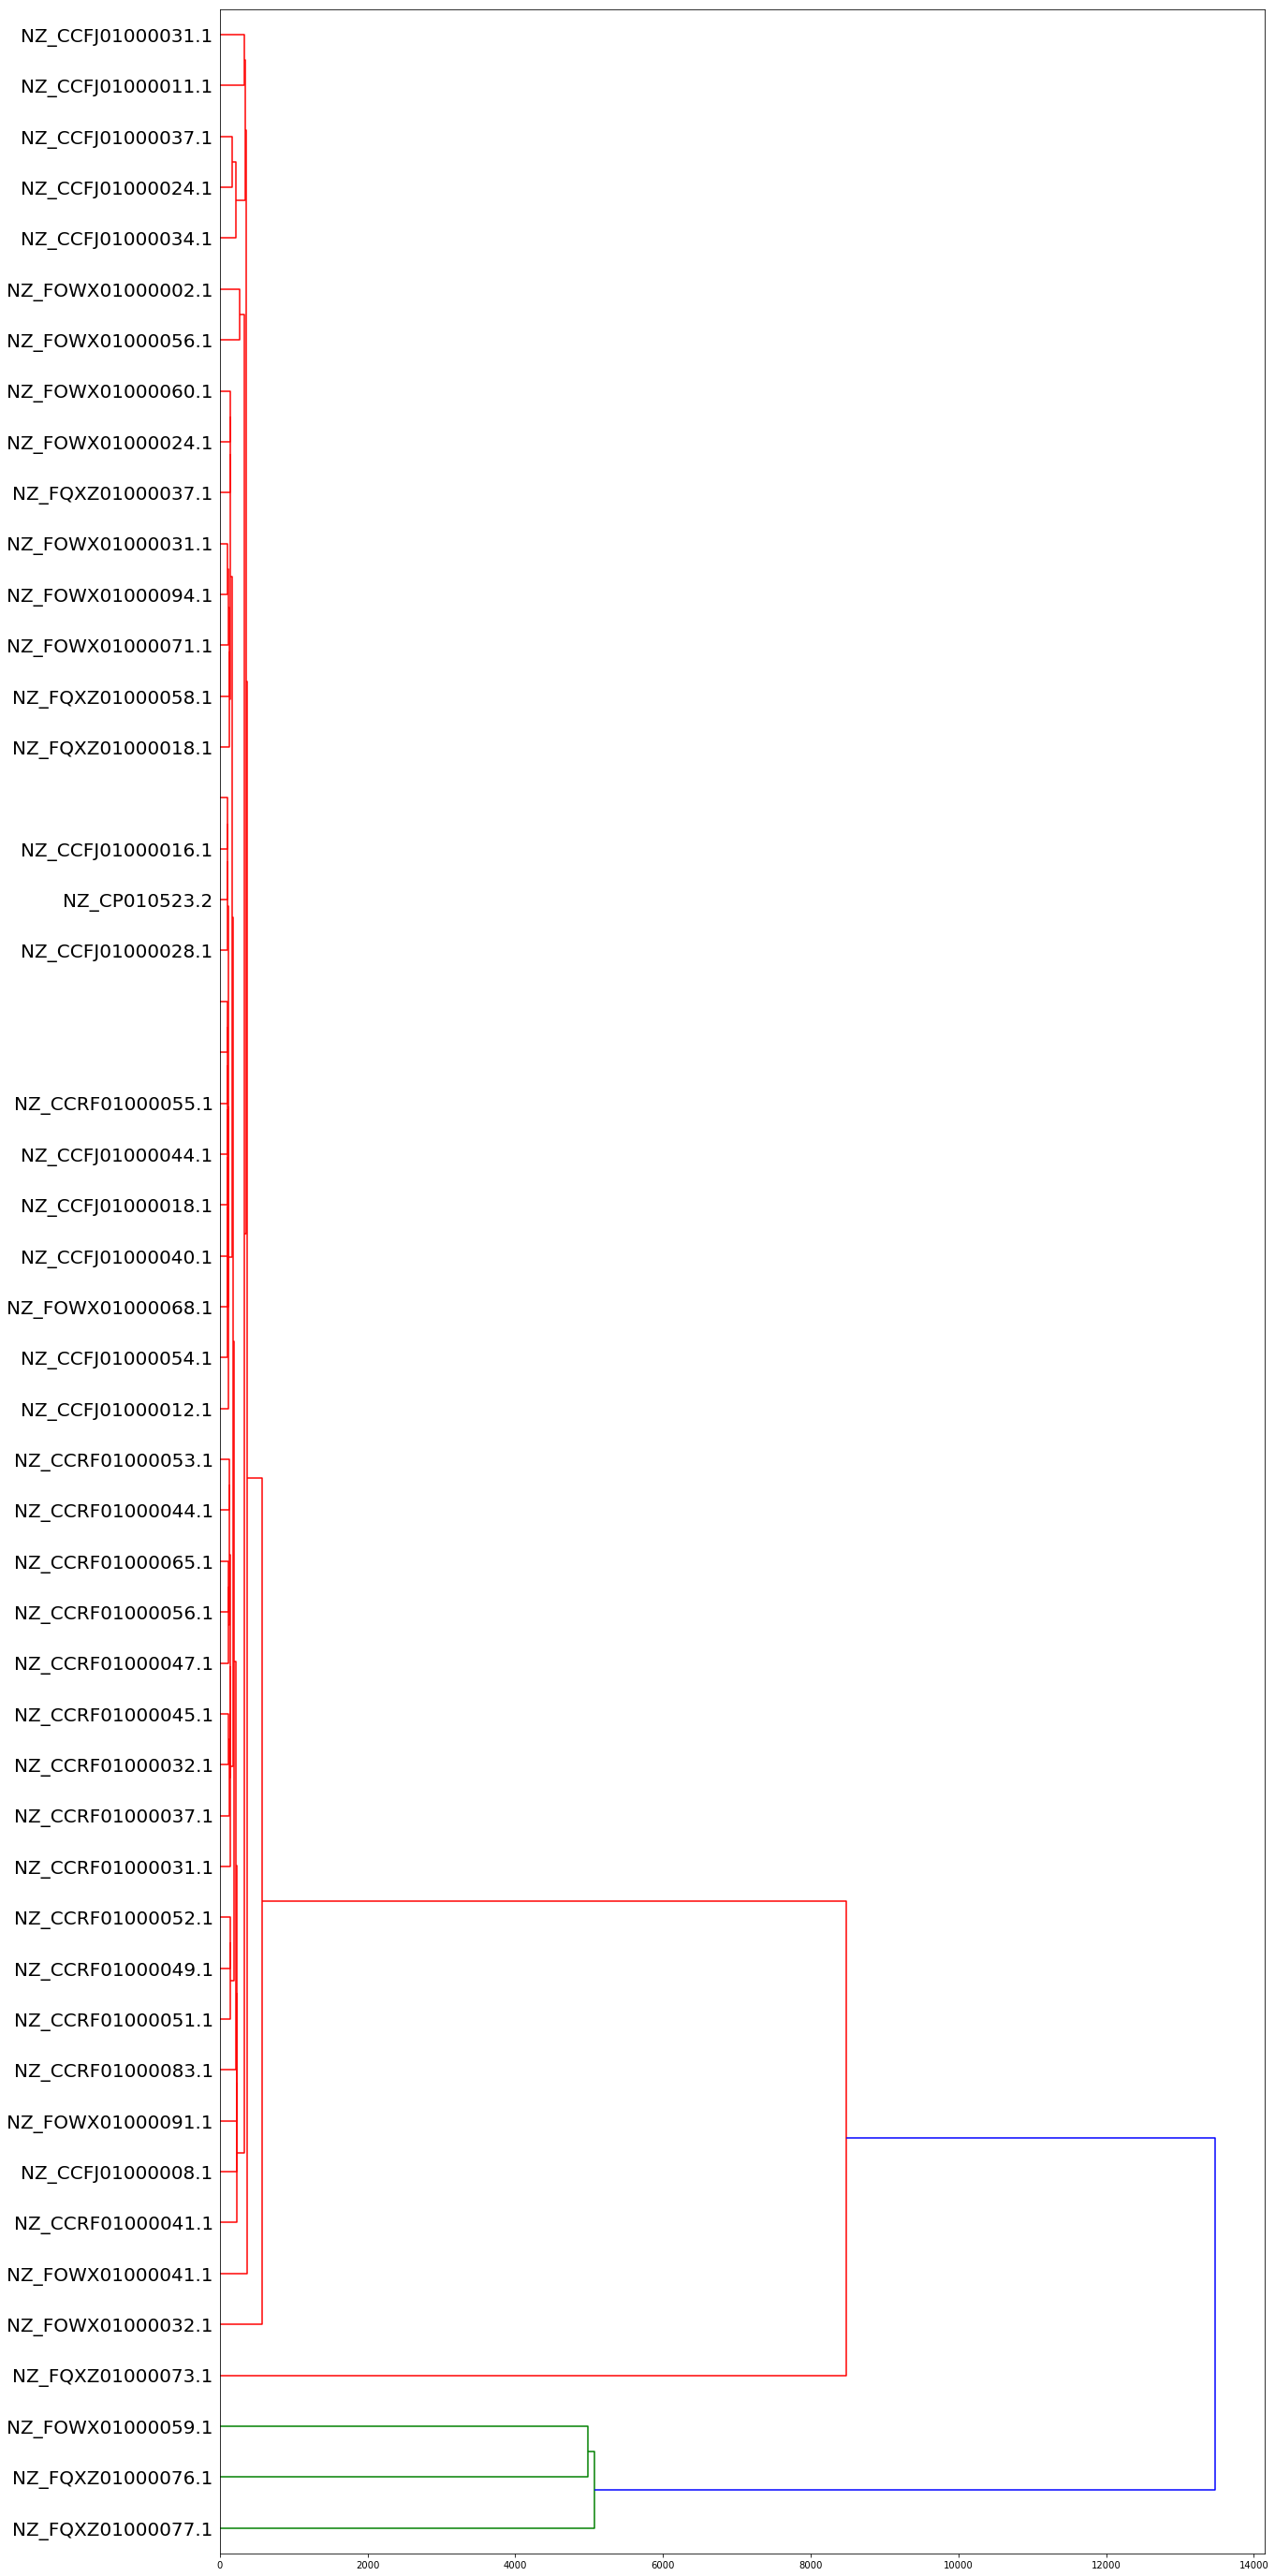

In [17]:
plt.figure(figsize=(20, 50))  
htree = dendrogram(linked,  
            orientation='right',
            p=50,
            truncate_mode='lastp',
            leaf_font_size = 20,
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False)
plt.show()  

In [88]:
htree['ivl'][20:22]

['NZ_CCRF01000098.1', 'NZ_CCRF01000101.1']

In [75]:
help(dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='b')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children.  The top of the U-link indicates a
    cluster merge.  The two legs of the U-link indicate which clusters
    were merged.  The length of the two legs of the U-link represents
    the distance between the child clusters.  It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
       

In [69]:
labelList.shape, X.shape

((164,), (164, 100))